### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score as acc


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
import multiprocessing

multiprocessing.cpu_count()

12

In [3]:
start = 1
end = 36

### Option 1: Automatic Data Preprocessing

The function Preprocessing_of_data fetches the raw data from GitHub, processes it, and returns the processed datasets.
Note: This may take some time. Alternatively, consider Option 2 for a more hands-on approach.

In [ ]:
# Import necessary libraries and extensions
%load_ext autoreload
%autoreload 2
from Preprocessing_def import * 

### Option 2: Manual Data Preprocessing

To manually view and run the preprocessing code:
1. Ensure the .py file and this Jupyter notebook are in the same directory.
2. Uncomment the line below.

In [ ]:
# %load ./Preprocessing_code_normal.py

### Setting Directory

In [ ]:
directory = r'C:\Users\peterolawale\Downloads\DF'
directory = directory.replace("\\", "/")

### Optional: Save processed data to CSV

Adjust the directory path as needed. **Only run this code if you run any of the above data processing code**

In [4]:
def save_data_to_csv(start=start, end=end, directory=directory):
    for i in range(start, end):
        suffix = f'S{i:02}'
        path = directory + f'df_Stress_{suffix}.csv'
        
        # Saving to CSV
        current_df = globals()[f'df{i}']
        current_df.to_csv(path, index=False)

In [ ]:
save_data_to_csv()

### Read processed data to Variables

Run this to run load the data even if you have not ran the processing code

In [5]:
# Import CSV files back for further use
def load_data_from_csv(start=1, end=36, directory=directory):
    for i in range(start, end):
        suffix = f'S{i:02}'
        path = directory + f'/df_Stress_{suffix}.csv'
        
        # Loading from CSV
        globals()[f'df{i}'] = pd.read_csv(path)

In [6]:
load_data_from_csv(start=1, end=36, directory=directory)

In [7]:
df12.head(5)

,x,y,z,Person,bvp,eda,temp,Label
0,-29.875,-6.500,57.125,S12,15.373750,2.908267,34.07,Stress
1,-30.000,-6.500,57.250,S12,-4.745000,2.894168,34.07,Stress
2,-29.875,-6.750,57.250,S12,-17.812500,2.878788,34.05,Stress
3,-29.625,-6.875,57.250,S12,11.801875,2.865970,34.05,Stress
4,-30.000,-6.750,57.500,S12,8.325625,2.867252,34.05,Stress


In [22]:
import random

def generate_random_numbers(n=52, seed=123):
    random.seed(seed)
    result = []
    
    available_numbers = list(range(start, end-1))  # 1 to 35
    for _ in range(n):
        if not available_numbers:
            break
        chosen = random.choice(available_numbers)
        available_numbers.remove(chosen)
        result.append(chosen)
    
    return result



def df_train_number(length=20):
    numbers = generate_random_numbers(length)
    
    for i, num in enumerate(numbers, 1):
        var_name = f'df{i}'
        if var_name not in globals():  # Check if the variable already exists
            globals()[var_name] = [num]
    
    return numbers

In [13]:
def custom_round(value):
    fractional_part = value - int(value)
    if fractional_part >= 0.5:
        return int(value) + 1
    else:
        return int(value)

How many percent do you want to train?

In [14]:
train_percentage = 70
train_num = custom_round(train_percentage / 100 * (end - 1))

In [23]:
df19

,x,y,z,Person,bvp,eda,temp,Label
0,-29.875,-8.250,55.625,S19,29.241875,0.138375,31.31,Stress
1,-30.000,-7.625,55.500,S19,25.035625,0.137094,31.31,Stress
2,-30.125,-7.750,55.500,S19,-37.595000,0.138375,31.29,Stress
3,-29.875,-8.000,55.375,S19,24.805625,0.137094,31.29,Stress
4,-30.250,-8.000,55.250,S19,32.671250,0.137094,31.29,Stress
...,...,...,...,...,...,...,...,...
10075,-46.000,16.000,41.875,S19,-2.771250,0.050236,30.11,Normal
10076,-56.125,17.125,46.500,S19,21.328750,0.051517,30.11,Normal
10077,-50.375,-17.250,34.125,S19,4.661875,0.051517,30.11,Normal
10078,-8.250,2.125,47.750,S19,-23.876250,0.048955,30.09,Normal


In [25]:
train_list = df_train_number(train_num)

In [29]:
def concatenate_dataframes_from_numbers(rand_numbers=train_num):
    dataframes = [globals()[f'df{num}'] for num in rand_numbers]
    return pd.concat(dataframes, axis=0)



df_train = concatenate_dataframes_from_numbers(train_list)

In [41]:
#df_train

In [31]:
def df_test_number(num=train_num):
    all_numbers = set(range(start, end-1))
    test_numbers = sorted(all_numbers - set(train_list))
    
    # Create DataFrames for the test numbers
    for num in test_numbers:
        var_name = f'df{num}'
        if var_name not in globals():  # Check if the variable already exists
            globals()[var_name] = pd.DataFrame([num], columns=['Value'])
    
    return test_numbers


In [33]:
test_list = df_test_number(train_num)

In [35]:
test_list

[6, 14, 15, 21, 22, 29, 31, 32, 33]

In [43]:
df=df_train.copy()

In [37]:
for num in test_list:
    # Construct the variable names for X and Y based on the number from test_list
    x_var_name = f"x_df{num}_test"
    y_var_name = f"y_df{num}_test"
    
    # Access the relevant dataframe using the globals function
    source_df = globals()[f"df{num}"]
    
    # Assign the processed data to the newly created variable names
    globals()[x_var_name] = source_df.drop(['Person', 'Label'], axis=1)
    globals()[y_var_name] = source_df['Label']
    
    print(f"x_df{num}_test, y_df{num}_test = df{num}.drop(['Person','Label'], axis=1), df{num}['Label']")


x_df6_test, y_df6_test = df6.drop(['Person','Label'], axis=1), df6['Label']
x_df14_test, y_df14_test = df14.drop(['Person','Label'], axis=1), df14['Label']
x_df15_test, y_df15_test = df15.drop(['Person','Label'], axis=1), df15['Label']
x_df21_test, y_df21_test = df21.drop(['Person','Label'], axis=1), df21['Label']
x_df22_test, y_df22_test = df22.drop(['Person','Label'], axis=1), df22['Label']
x_df29_test, y_df29_test = df29.drop(['Person','Label'], axis=1), df29['Label']
x_df31_test, y_df31_test = df31.drop(['Person','Label'], axis=1), df31['Label']
x_df32_test, y_df32_test = df32.drop(['Person','Label'], axis=1), df32['Label']
x_df33_test, y_df33_test = df33.drop(['Person','Label'], axis=1), df33['Label']


In [38]:
for num in test_list:
    print(f'length of S{num} dataframe =', len(globals()[f"df{num}"]))

length of S6 dataframe = 10560
length of S14 dataframe = 10320
length of S15 dataframe = 10320
length of S21 dataframe = 10014
length of S22 dataframe = 9782
length of S29 dataframe = 10320
length of S31 dataframe = 10058
length of S32 dataframe = 10268
length of S33 dataframe = 10320


In [45]:
# Prepare data
x_train, y_train = df.drop(['Person','Label'], axis=1), df['Label']

In [82]:
def model_analysis(model, x_train, y_train, test_list):
    """Evaluate and visualize model performance."""

    model.fit(x_train, y_train)
    cv_tr_score = cross_val_score(model, x_train, y_train, cv=5, scoring=make_scorer(acc))
    print('Cross-validation score on training data', round(cv_tr_score.mean(), 2))

    CV_scores = []
    FN_values = []
    accuracies = []  # Initialize accuracies list

    # Calculate the number of rows required for the given test_list
    rows = (len(test_list) + 2) // 3

    # Set up figure for confusion matrices
    fig_cm, axes_cm = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))

    # Set up figure for classification reports
    fig_report, axes_report = plt.subplots(nrows=rows, ncols=3, figsize=(15, 2 * rows))  # Reduced figure height for lesser spacing

    for index, test_num in enumerate(test_list):
        row = index // 3
        col = index % 3

        x_test = globals()[f'x_df{test_num}_test']
        y_test = globals()[f'y_df{test_num}_test']

        preds = model.predict(x_test)

        # Display accuracy
        accuracy = round(acc(y_test, preds), 2)
        accuracies.append(accuracy)  # Append the accuracy to the accuracies list

        print(f"\nAccuracy of the model on participant S{test_num} data:", accuracy)

        # Cross validate on the test data
        n_ts_cv = cross_val_score(model, x_test, y_test, cv=5, scoring=make_scorer(acc))
        print(f'Cross-validation score on Participant S{test_num} data:', round(n_ts_cv.mean(), 2))
        CV_scores.append(round(n_ts_cv.mean(), 2))

        # Plot confusion matrix
        plot_confusion_matrix(y_test, preds, axes_cm[row, col], title=f'S{test_num} Confusion Matrix')

        # Display classification report
        report = classification_report(y_test, preds)
        axes_report[row, col].axis('off')  # Turn off the axis
        axes_report[row, col].text(0.1, 0.9, f"S{test_num} Classification Report", fontsize=12, weight='bold')  # Repositioned title
        axes_report[row, col].text(0, 0.6, report, fontsize=10, va='top')

        # Append the FN value
        FN_values.append(confusion_matrix(y_test, preds)[1][0])

    # Remove unused subplots
    for i in range(index + 1, 3):
        axes_cm[row, i].axis('off')
        axes_report[row, i].axis('off')

    fig_cm.tight_layout()
    fig_report.tight_layout(pad=0.4, h_pad=0.5, w_pad=0.5)  # Adjusted padding for lesser spacing

    fig_cm.suptitle('Confusion Matrices', y=1.02)
    fig_report.suptitle('Classification Reports', y=1.05)

    plt.show()

    for i, test_num in enumerate(test_list):
        print(f"\nCV of S{test_num} =", CV_scores[i])
        x_test_global = globals()[f'df{test_num}']
        print(f"S{test_num} Accuracy =", round(acc(x_test_global['Label'], model.predict(x_test_global.drop(['Person', 'Label'], axis=1))), 2))
        print(f"The FN of S{test_num} =", FN_values[i])

    return accuracies, CV_scores, FN_values


Random Forest Analysis
--------------------
Cross-validation score on training data 0.6

Accuracy of the model on participant S6 data: 0.58
Cross-validation score on Participant S6 data: 0.67

Accuracy of the model on participant S14 data: 0.51
Cross-validation score on Participant S14 data: 0.65

Accuracy of the model on participant S15 data: 0.64
Cross-validation score on Participant S15 data: 0.74

Accuracy of the model on participant S21 data: 0.71
Cross-validation score on Participant S21 data: 0.81

Accuracy of the model on participant S22 data: 0.6
Cross-validation score on Participant S22 data: 0.76

Accuracy of the model on participant S29 data: 0.61
Cross-validation score on Participant S29 data: 0.67

Accuracy of the model on participant S31 data: 0.52
Cross-validation score on Participant S31 data: 0.82

Accuracy of the model on participant S32 data: 0.65
Cross-validation score on Participant S32 data: 0.73

Accuracy of the model on participant S33 data: 0.51
Cross-validati

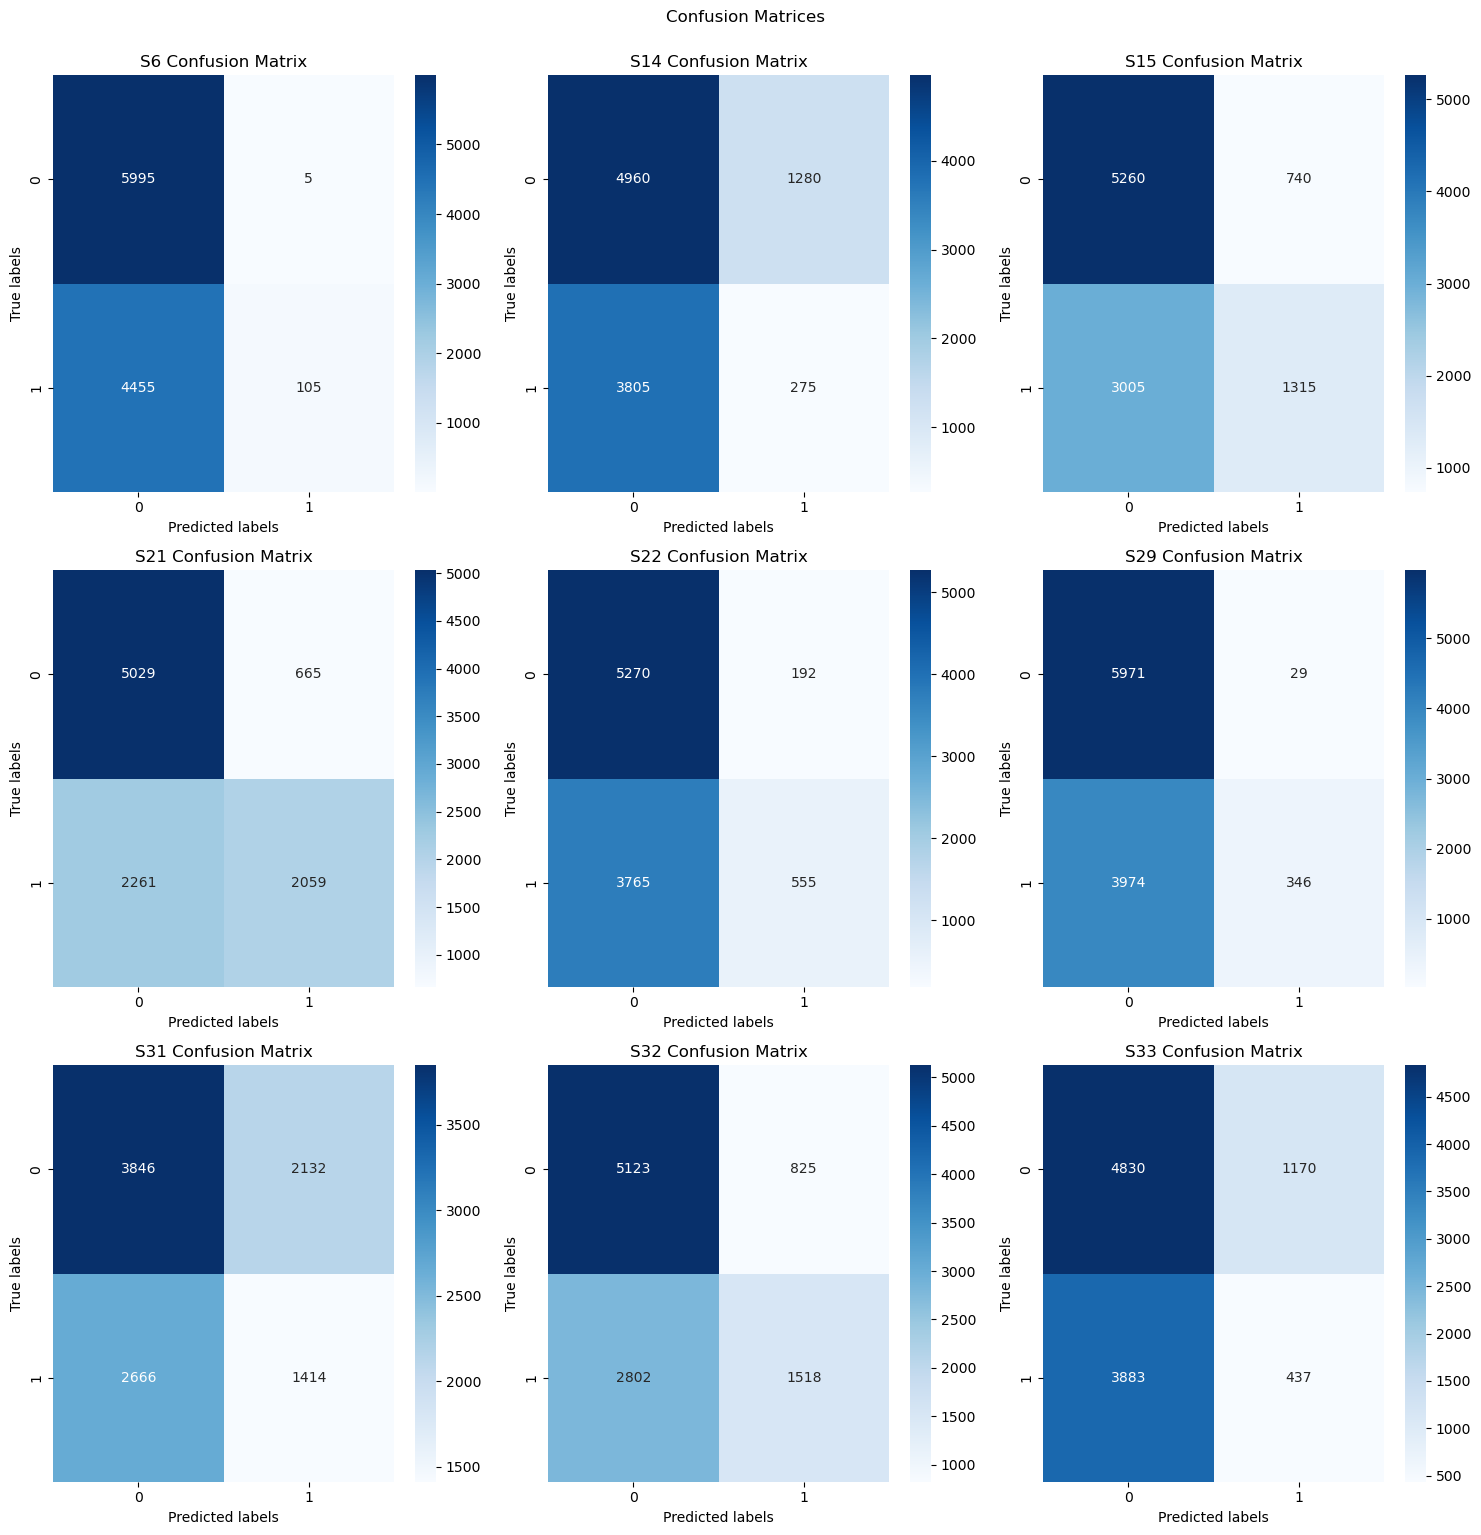

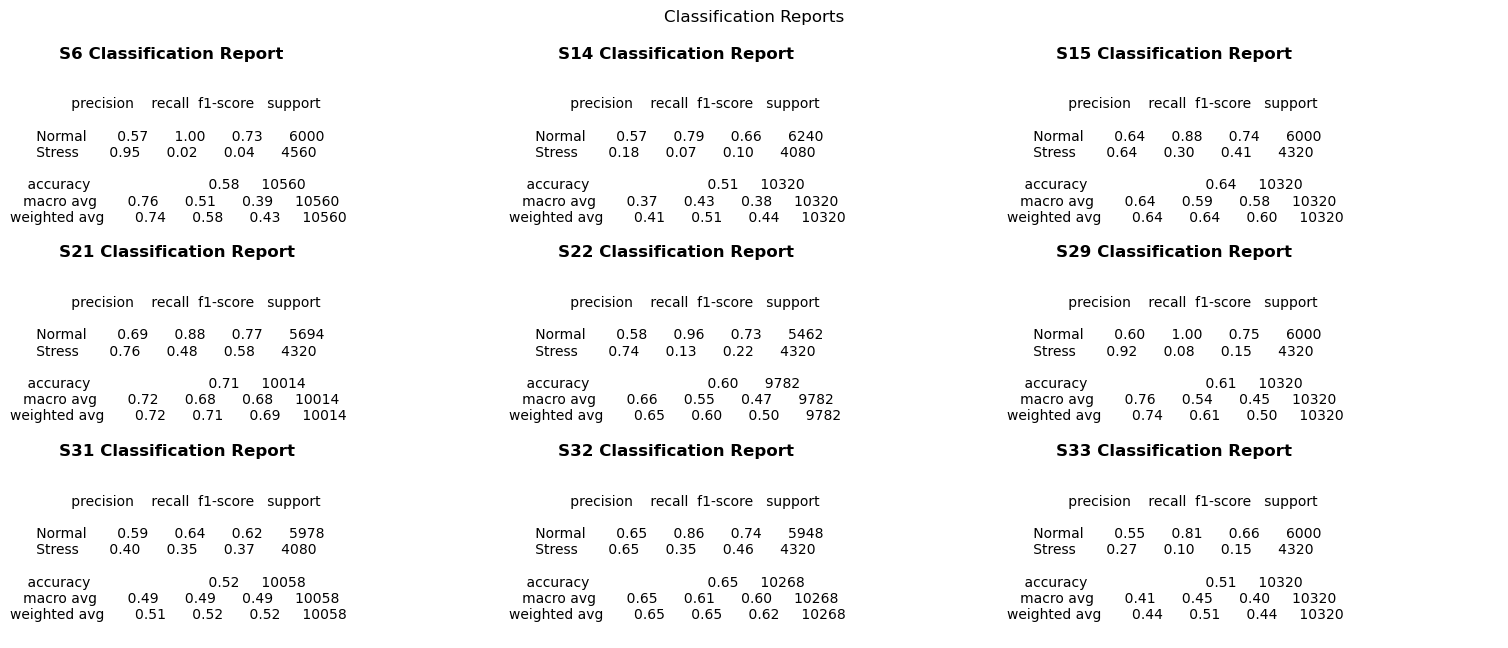


CV of S6 = 0.67
S6 Accuracy = 0.58
The FN of S6 = 4455

CV of S14 = 0.65
S14 Accuracy = 0.51
The FN of S14 = 3805

CV of S15 = 0.74
S15 Accuracy = 0.64
The FN of S15 = 3005

CV of S21 = 0.81
S21 Accuracy = 0.71
The FN of S21 = 2261

CV of S22 = 0.76
S22 Accuracy = 0.6
The FN of S22 = 3765

CV of S29 = 0.67
S29 Accuracy = 0.61
The FN of S29 = 3974

CV of S31 = 0.82
S31 Accuracy = 0.52
The FN of S31 = 2666

CV of S32 = 0.73
S32 Accuracy = 0.65
The FN of S32 = 2802

CV of S33 = 0.54
S33 Accuracy = 0.51
The FN of S33 = 3883


In [72]:
# Random Forest
print("Random Forest Analysis\n" + "-"*20)
rf = RandomForestClassifier(n_estimators=200, max_depth = 6, random_state=42)
model_analysis(rf, x_train, y_train, test_list)

Logistic Regression Analysis
--------------------
Cross-validation score on training data 0.58

Accuracy of the model on participant S6 data: 0.57
Cross-validation score on Participant S6 data: 0.66

Accuracy of the model on participant S14 data: 0.6
Cross-validation score on Participant S14 data: 0.64

Accuracy of the model on participant S15 data: 0.58
Cross-validation score on Participant S15 data: 0.59

Accuracy of the model on participant S21 data: 0.57
Cross-validation score on Participant S21 data: 0.61

Accuracy of the model on participant S22 data: 0.56
Cross-validation score on Participant S22 data: 0.75

Accuracy of the model on participant S29 data: 0.58
Cross-validation score on Participant S29 data: 0.68

Accuracy of the model on participant S31 data: 0.59
Cross-validation score on Participant S31 data: 0.77

Accuracy of the model on participant S32 data: 0.58
Cross-validation score on Participant S32 data: 0.7

Accuracy of the model on participant S33 data: 0.58
Cross-va

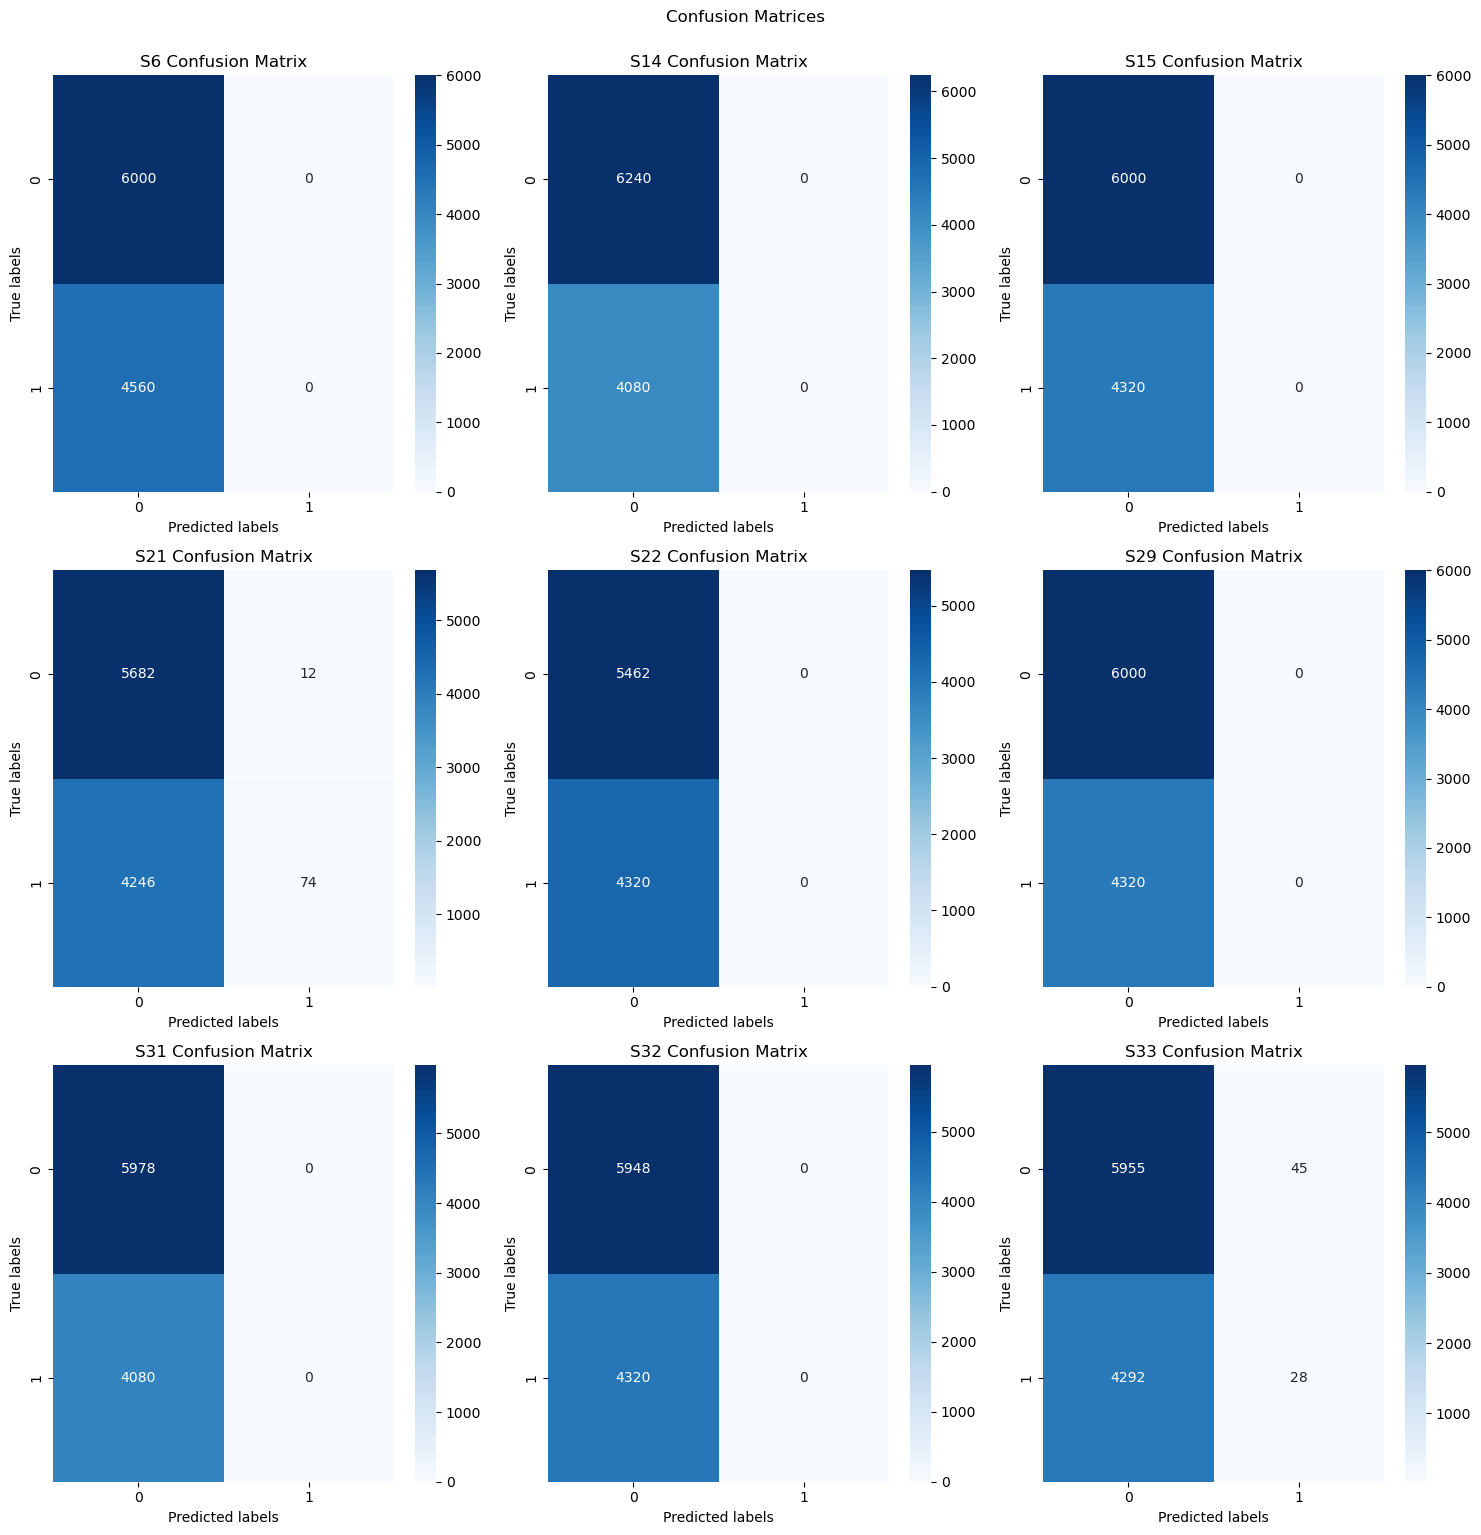

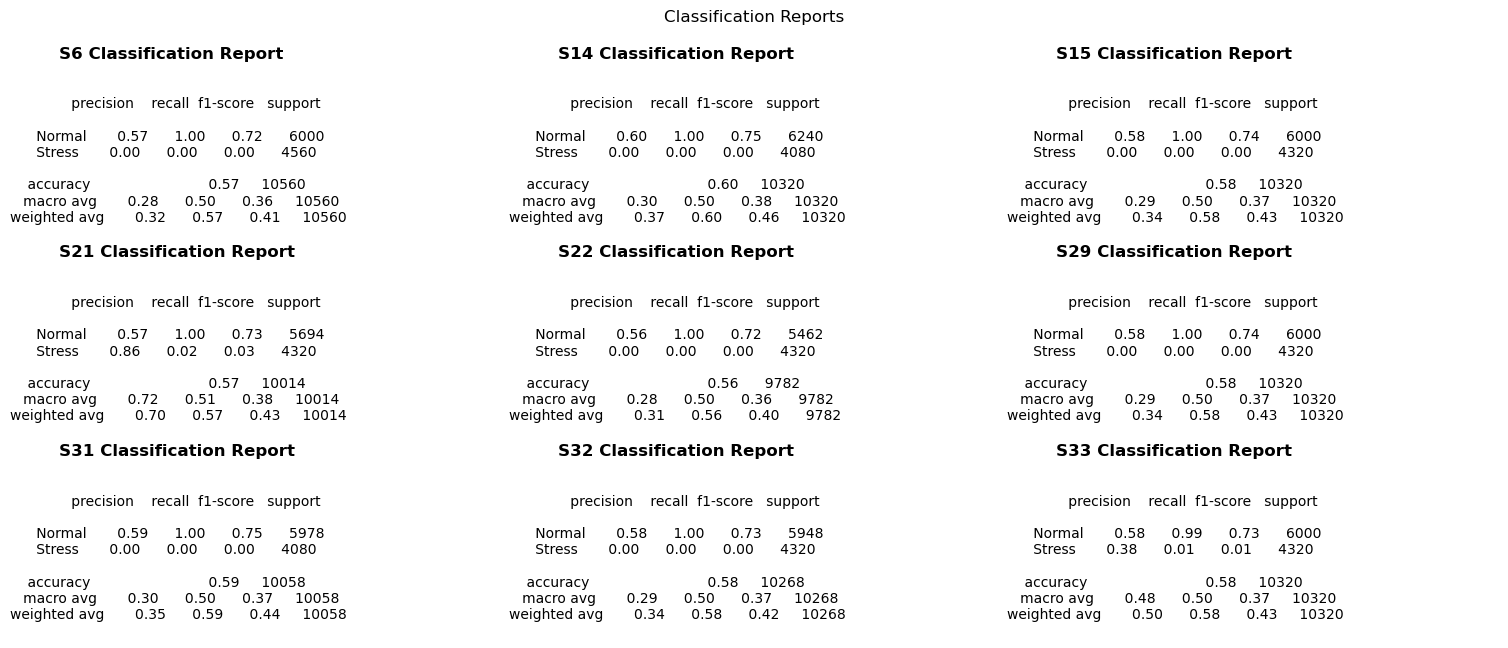


CV of S6 = 0.66
S6 Accuracy = 0.57
The FN of S6 = 4560

CV of S14 = 0.64
S14 Accuracy = 0.6
The FN of S14 = 4080

CV of S15 = 0.59
S15 Accuracy = 0.58
The FN of S15 = 4320

CV of S21 = 0.61
S21 Accuracy = 0.57
The FN of S21 = 4246

CV of S22 = 0.75
S22 Accuracy = 0.56
The FN of S22 = 4320

CV of S29 = 0.68
S29 Accuracy = 0.58
The FN of S29 = 4320

CV of S31 = 0.77
S31 Accuracy = 0.59
The FN of S31 = 4080

CV of S32 = 0.7
S32 Accuracy = 0.58
The FN of S32 = 4320

CV of S33 = 0.56
S33 Accuracy = 0.58
The FN of S33 = 4292


In [63]:
# Logistic Regression
print("Logistic Regression Analysis\n" + "-"*20)
lr = LogisticRegression(random_state=42)
model_analysis(lr, x_train, y_train, test_list)

Decision Tree Analysis
--------------------
Cross-validation score on training data 0.53

Accuracy of the model on participant S6 data: 0.58
Cross-validation score on Participant S6 data: 0.64

Accuracy of the model on participant S14 data: 0.69
Cross-validation score on Participant S14 data: 0.64

Accuracy of the model on participant S15 data: 0.58
Cross-validation score on Participant S15 data: 0.68

Accuracy of the model on participant S21 data: 0.64
Cross-validation score on Participant S21 data: 0.81

Accuracy of the model on participant S22 data: 0.57
Cross-validation score on Participant S22 data: 0.63

Accuracy of the model on participant S29 data: 0.57
Cross-validation score on Participant S29 data: 0.65

Accuracy of the model on participant S31 data: 0.45
Cross-validation score on Participant S31 data: 0.8

Accuracy of the model on participant S32 data: 0.64
Cross-validation score on Participant S32 data: 0.71

Accuracy of the model on participant S33 data: 0.56
Cross-validat

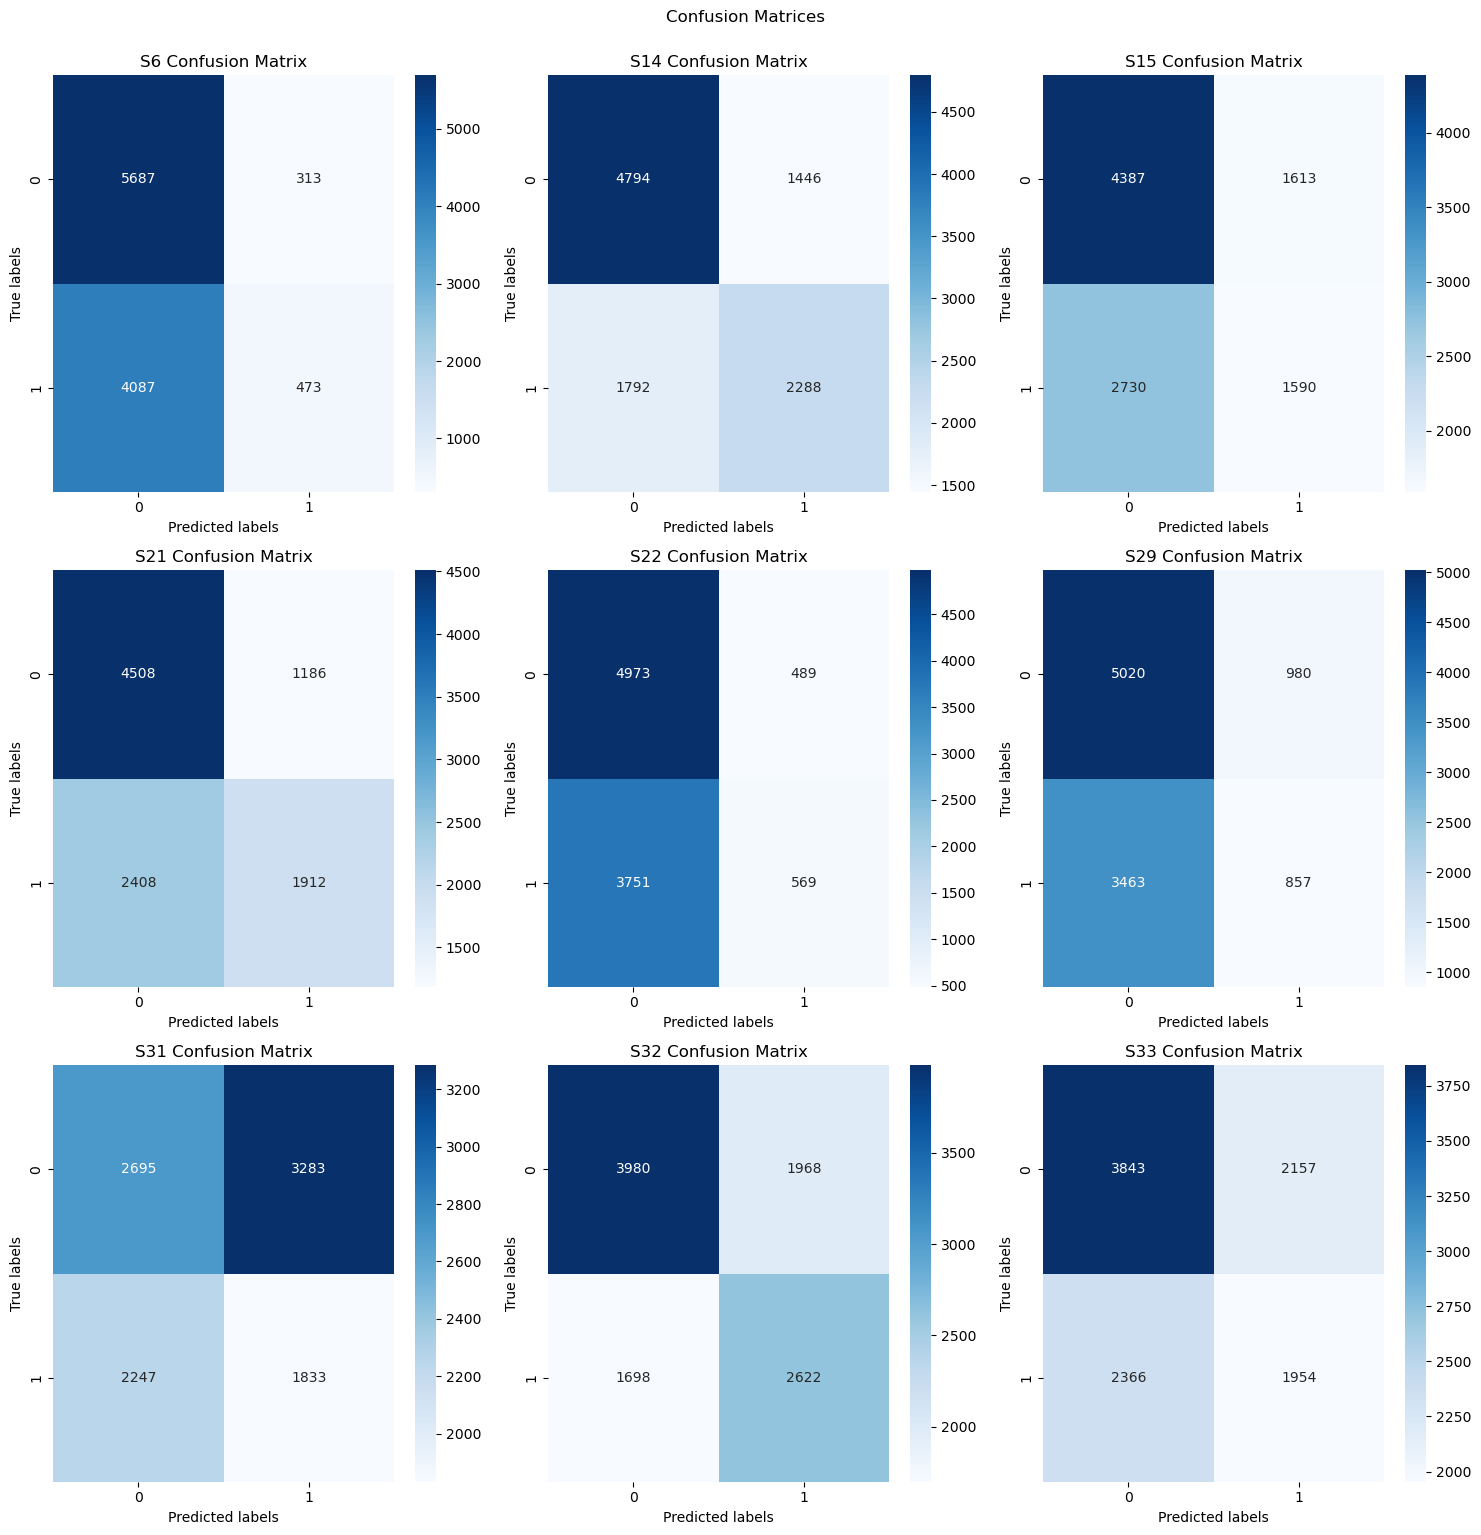

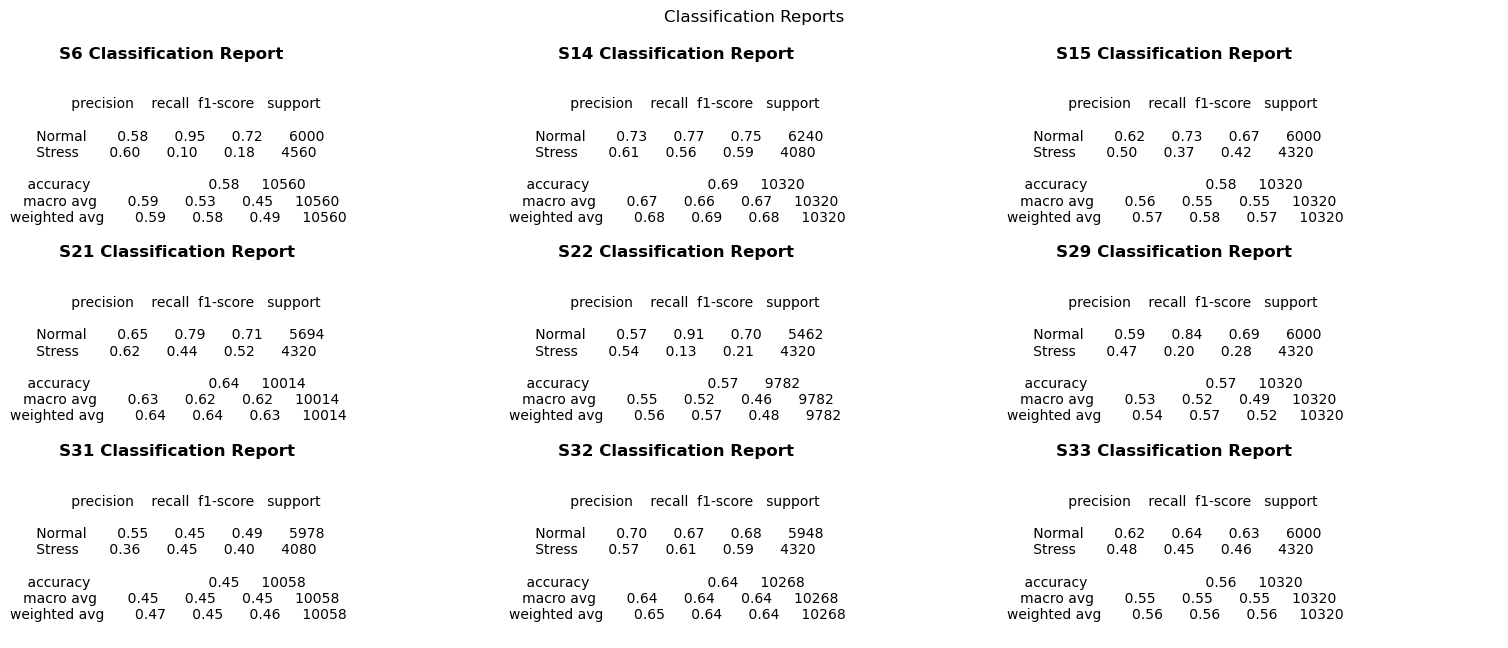


CV of S6 = 0.64
S6 Accuracy = 0.58
The FN of S6 = 4087

CV of S14 = 0.64
S14 Accuracy = 0.69
The FN of S14 = 1792

CV of S15 = 0.68
S15 Accuracy = 0.58
The FN of S15 = 2730

CV of S21 = 0.81
S21 Accuracy = 0.64
The FN of S21 = 2408

CV of S22 = 0.63
S22 Accuracy = 0.57
The FN of S22 = 3751

CV of S29 = 0.65
S29 Accuracy = 0.57
The FN of S29 = 3463

CV of S31 = 0.8
S31 Accuracy = 0.45
The FN of S31 = 2247

CV of S32 = 0.71
S32 Accuracy = 0.64
The FN of S32 = 1698

CV of S33 = 0.6
S33 Accuracy = 0.56
The FN of S33 = 2366


In [64]:
# Decision Tree
print("Decision Tree Analysis\n" + "-"*20)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
model_analysis(dt, x_train, y_train, test_list)

In [73]:
def plot_metric_values(test_labels, accuracies, CV_scores, FN_values):
    """Plot accuracy, cross-validation, and FN for each test dataset."""
    
    # Set up the seaborn style
    sns.set_style("whitegrid")

    metrics = [
        ("Accuracy Scores for Test Datasets", accuracies, "blue"),
        ("Cross-Validation Scores for Test Datasets", CV_scores, "green"),
        ("False Negatives for Test Datasets", FN_values, "red")
    ]

    for title, values, color in metrics:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=test_labels, y=values, marker="o", color=color)
        plt.title(title)
        plt.xlabel("Test Dataset")
        plt.ylabel(title.split(" ")[0])  # Extract the first word of the title for the y-axis
        plt.show()


Random Forest Analysis
--------------------
Cross-validation score on training data 0.6

Accuracy of the model on participant S6 data: 0.58
Cross-validation score on Participant S6 data: 0.67

Accuracy of the model on participant S14 data: 0.51
Cross-validation score on Participant S14 data: 0.65

Accuracy of the model on participant S15 data: 0.64
Cross-validation score on Participant S15 data: 0.74

Accuracy of the model on participant S21 data: 0.71
Cross-validation score on Participant S21 data: 0.81

Accuracy of the model on participant S22 data: 0.6
Cross-validation score on Participant S22 data: 0.76

Accuracy of the model on participant S29 data: 0.61
Cross-validation score on Participant S29 data: 0.67

Accuracy of the model on participant S31 data: 0.52
Cross-validation score on Participant S31 data: 0.82

Accuracy of the model on participant S32 data: 0.65
Cross-validation score on Participant S32 data: 0.73

Accuracy of the model on participant S33 data: 0.51
Cross-validati

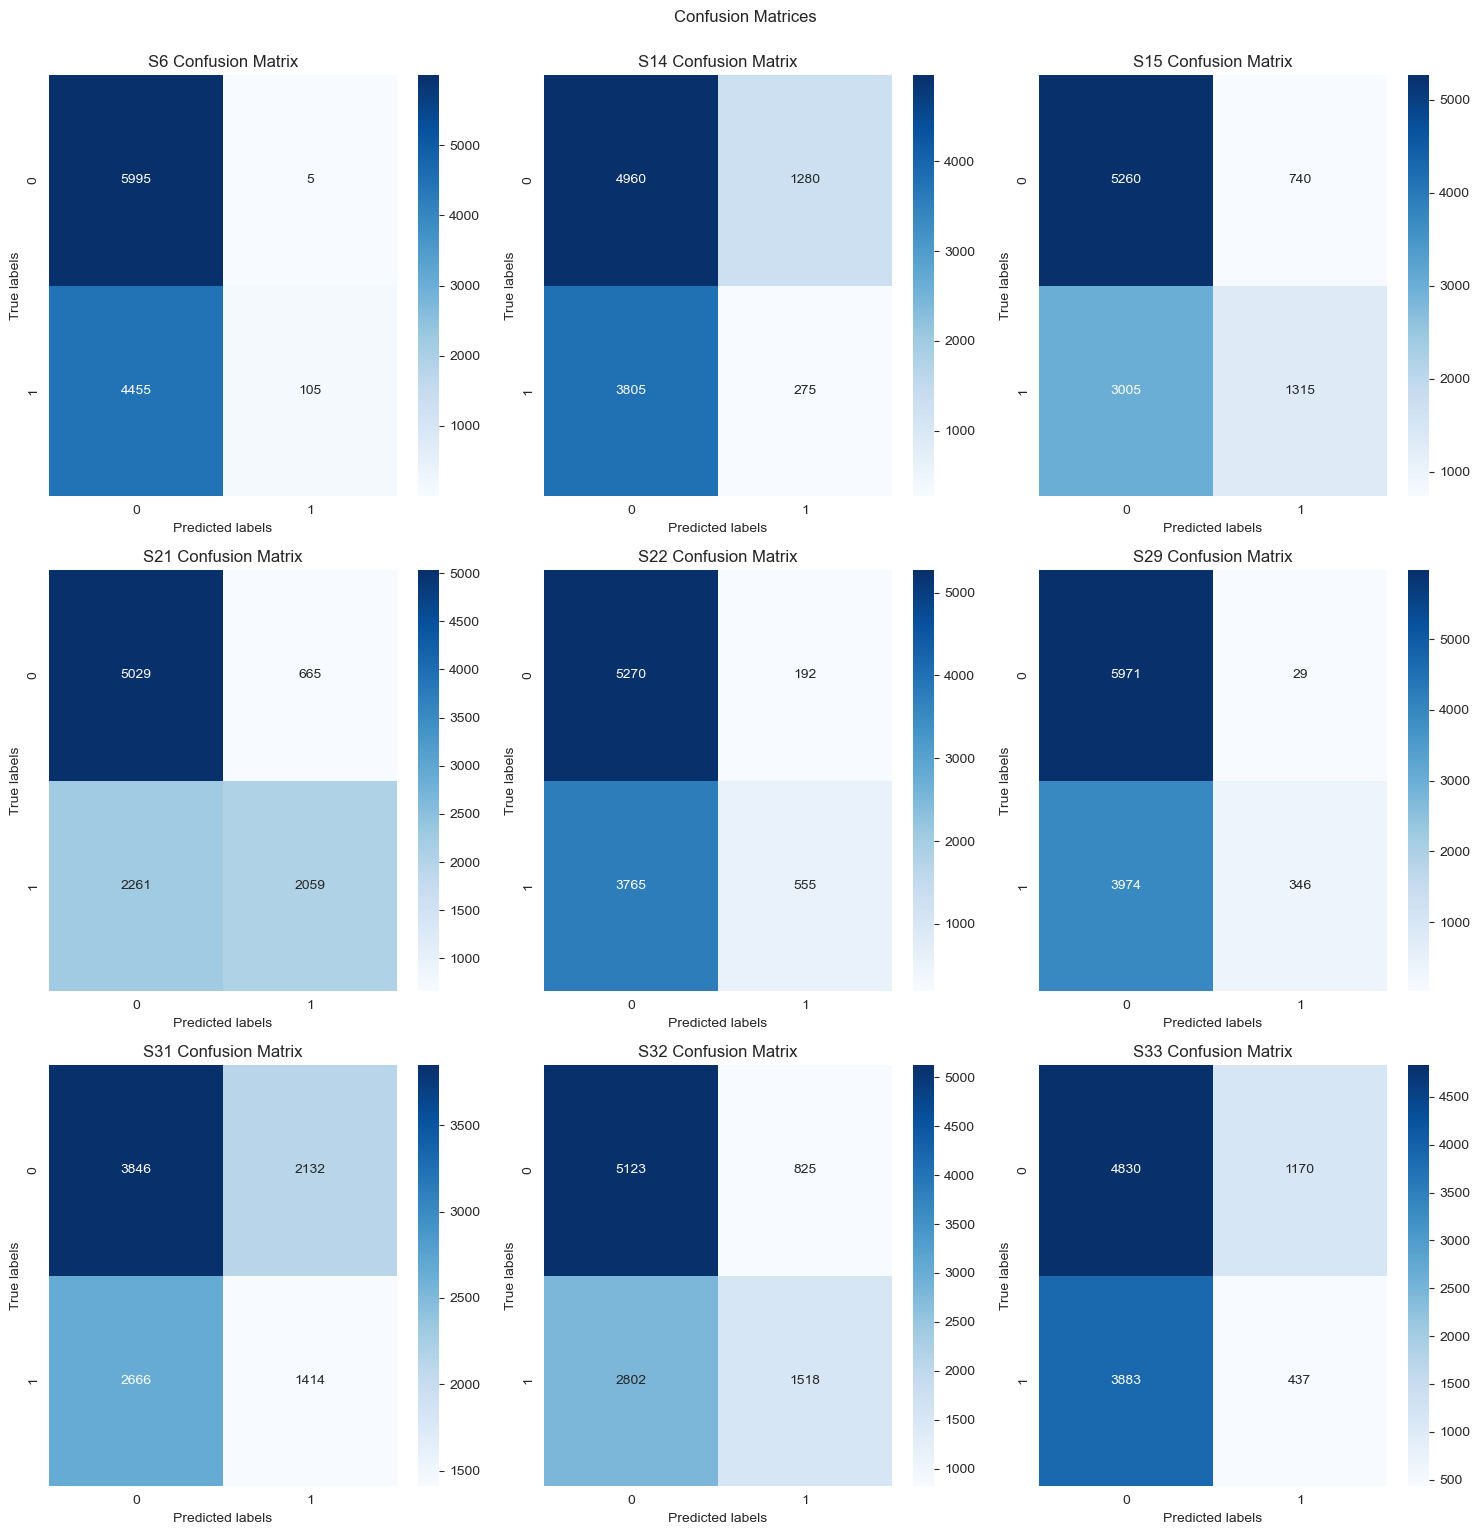

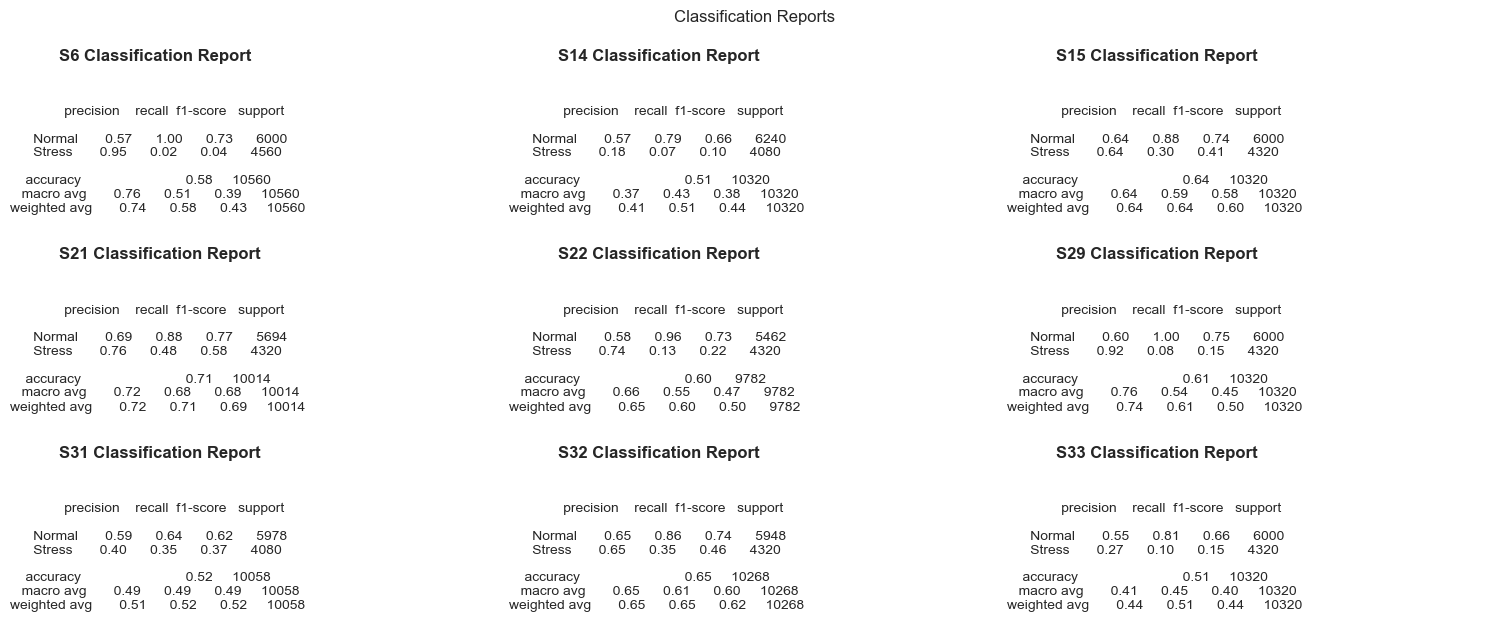


CV of S6 = 0.67
S6 Accuracy = 0.58
The FN of S6 = 4455

CV of S14 = 0.65
S14 Accuracy = 0.51
The FN of S14 = 3805

CV of S15 = 0.74
S15 Accuracy = 0.64
The FN of S15 = 3005

CV of S21 = 0.81
S21 Accuracy = 0.71
The FN of S21 = 2261

CV of S22 = 0.76
S22 Accuracy = 0.6
The FN of S22 = 3765

CV of S29 = 0.67
S29 Accuracy = 0.61
The FN of S29 = 3974

CV of S31 = 0.82
S31 Accuracy = 0.52
The FN of S31 = 2666

CV of S32 = 0.73
S32 Accuracy = 0.65
The FN of S32 = 2802

CV of S33 = 0.54
S33 Accuracy = 0.51
The FN of S33 = 3883


In [83]:
print("Random Forest Analysis\n" + "-"*20)
rf = RandomForestClassifier(n_estimators=200, max_depth = 6, random_state=42)
accuracies, CV_scores, FN_values = model_analysis(rf, x_train, y_train, test_list)

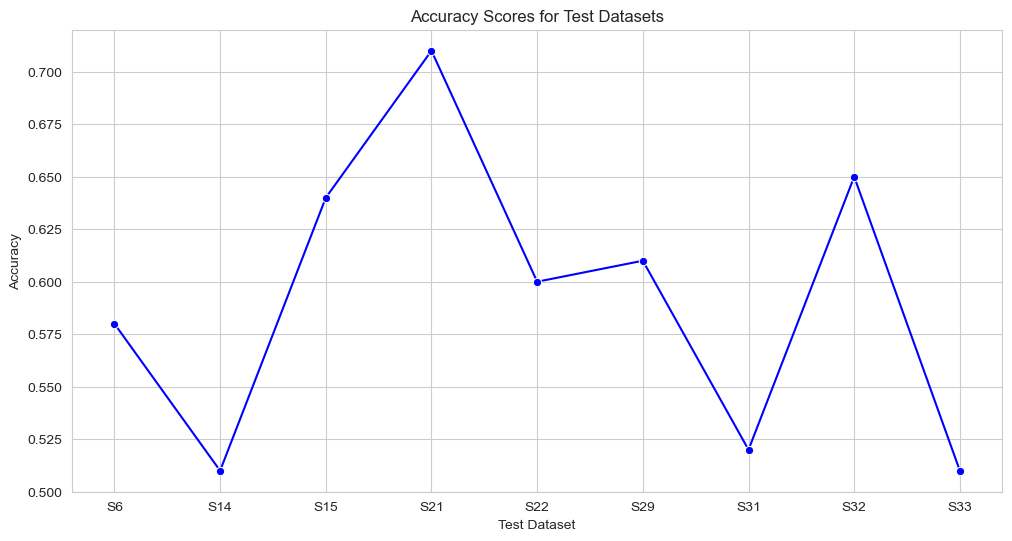

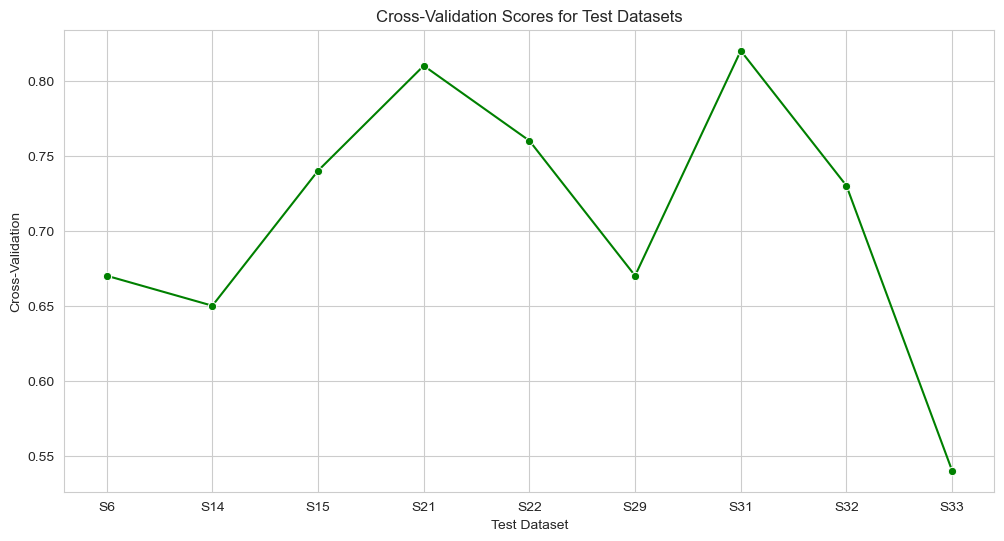

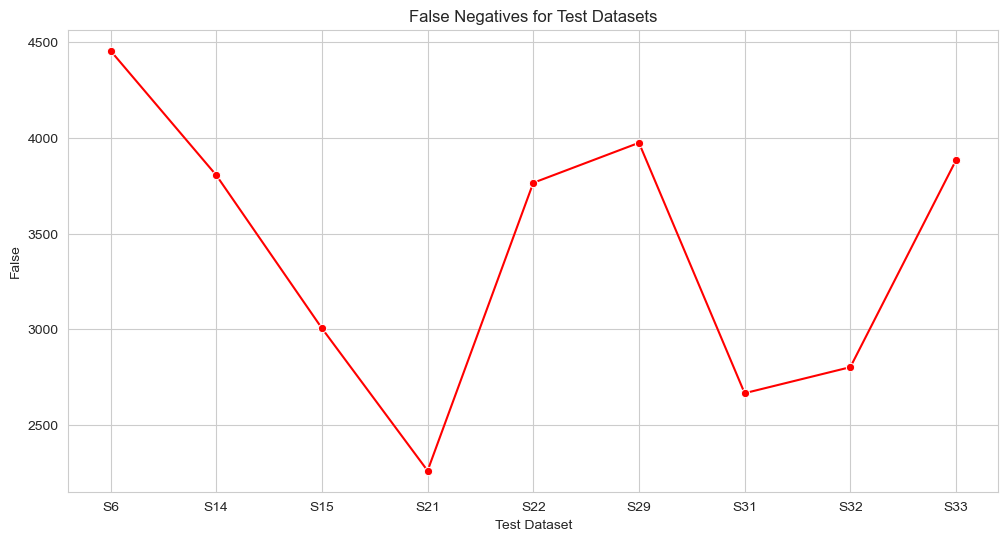

In [85]:
test_labels = [f"S{test_num}" for test_num in test_list]
plot_metric_values(test_labels, accuracies, CV_scores, FN_values)

In [84]:
#print(len(test_list), len(accuracies), len(CV_scores), len(FN_values))

9 9 9 9


__You can remove the code below, it was for testing. It has nothing to do with the analysis__

In [ ]:
def model_analysis(model, x_train, y_train, test_list):
    """Evaluate and visualize model performance."""

    model.fit(x_train, y_train)
    cv_tr_score = cross_val_score(model, x_train, y_train, cv=5, scoring=make_scorer(acc))
    print('Cross-validation score on training data', round(cv_tr_score.mean(),2))

    CV_scores = []
    FN_values = []

    # Calculate the number of rows required for the given test_list
    rows = (len(test_list) + 2) // 3

    # Set up figure for confusion matrices
    fig_cm, axes_cm = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5*rows))
    
    # Set up figure for classification reports
    fig_report, axes_report = plt.subplots(nrows=rows, ncols=3, figsize=(15, 2*rows))  # Reduced figure height for lesser spacing

    for index, test_num in enumerate(test_list):
        row = index // 3
        col = index % 3

        x_test = globals()[f'x_df{test_num}_test']
        y_test = globals()[f'y_df{test_num}_test']

        preds = model.predict(x_test)

        # Display accuracy
        print(f"\nAccuracy of the model on participant S{test_num} data:", round(acc(y_test, preds), 2))

        # Cross validate on the test data
        n_ts_cv = cross_val_score(model, x_test, y_test, cv=5, scoring=make_scorer(acc))
        print(f'Cross-validation score on Participant S{test_num} data:', round(n_ts_cv.mean(),2))
        CV_scores.append(round(n_ts_cv.mean(), 2))

        # Plot confusion matrix
        plot_confusion_matrix(y_test, preds, axes_cm[row, col], title=f'S{test_num} Confusion Matrix')

        # Display classification report
        report = classification_report(y_test, preds)
        axes_report[row, col].axis('off')  # Turn off the axis
        axes_report[row, col].text(0.1, 0.9, f"S{test_num} Classification Report", fontsize=12, weight='bold')  # Repositioned title
        axes_report[row, col].text(0, 0.6, report, fontsize=10, va='top')

        # Append the FN value
        FN_values.append(confusion_matrix(y_test, preds)[1][0])

    # Remove unused subplots
    for i in range(index+1, 3):
        axes_cm[row, i].axis('off')
        axes_report[row, i].axis('off')

    fig_cm.tight_layout()
    fig_report.tight_layout(pad=0.4, h_pad=0.5, w_pad=0.5)  # Adjusted padding for lesser spacing

    fig_cm.suptitle('Confusion Matrices', y=1.02)
    fig_report.suptitle('Classification Reports', y=1.05)

    plt.show()

    for i, test_num in enumerate(test_list):
        print(f"\nCV of S{test_num} =", CV_scores[i])
        x_test_global = globals()[f'df{test_num}']
        print(f"S{test_num} Accuracy =", round(acc(x_test_global['Label'], model.predict(x_test_global.drop(['Person', 'Label'], axis=1))), 2))
        print(f"The FN of S{test_num} =", FN_values[i])

    return accuracies, CV_scores, FN_values
    